In [14]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd

In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Loading the NIPS papers

In [7]:
# Read the CSV file from Google Drive
papers = pd.read_csv('/content/drive/MyDrive/Portfolio/NLP/NIPS/papers.csv')

# Print out the first rows of papers
print(papers.head)

<bound method NDFrame.head of         id  year                                              title  \
0        1  1987  Self-Organization of Associative Database and ...   
1       10  1987  A Mean Field Theory of Layer IV of Visual Cort...   
2      100  1988  Storing Covariance by the Associative Long-Ter...   
3     1000  1994  Bayesian Query Construction for Neural Network...   
4     1001  1994  Neural Network Ensembles, Cross Validation, an...   
...    ...   ...                                                ...   
7236   994  1994                Single Transistor Learning Synapses   
7237   996  1994  Bias, Variance and the Combination of Least Sq...   
7238   997  1994          A Real Time Clustering CMOS Neural Engine   
7239   998  1994  Learning direction in global motion: two class...   
7240   999  1994  Correlation and Interpolation Networks for Rea...   

     event_type                                           pdf_name  \
0           NaN  1-self-organization-of-associa

Remove all the columns that do not contain useful text information.

In [8]:
# Remove the columns
# List of columns to drop
columns_to_drop = ['id', 'event_type', 'pdf_name']

# Dropping the columns
papers = papers.drop(columns_to_drop, axis=1)

# Print out the first rows of papers
print(papers.head)

<bound method NDFrame.head of       year                                              title  \
0     1987  Self-Organization of Associative Database and ...   
1     1987  A Mean Field Theory of Layer IV of Visual Cort...   
2     1988  Storing Covariance by the Associative Long-Ter...   
3     1994  Bayesian Query Construction for Neural Network...   
4     1994  Neural Network Ensembles, Cross Validation, an...   
...    ...                                                ...   
7236  1994                Single Transistor Learning Synapses   
7237  1994  Bias, Variance and the Combination of Least Sq...   
7238  1994          A Real Time Clustering CMOS Neural Engine   
7239  1994  Learning direction in global motion: two class...   
7240  1994  Correlation and Interpolation Networks for Rea...   

              abstract                                         paper_text  
0     Abstract Missing  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1     Abstract Missing  683\n\nA MEAN

Visualizing the number of publications per year

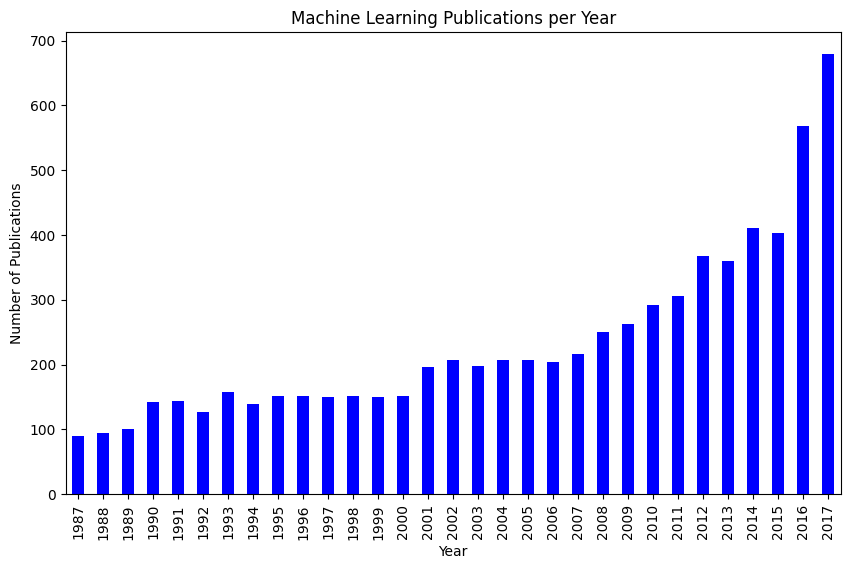

In [9]:
# Group the papers by year
groups = papers.groupby('year')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Machine Learning Publications per Year')
plt.show()


Preprocessing the text data

In [10]:
# Load the regular expression library
import re

# Print the titles of the first rows
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows
print(papers['title_processed'].head())


0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object
0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object


A word cloud to visualize the preprocessed text data

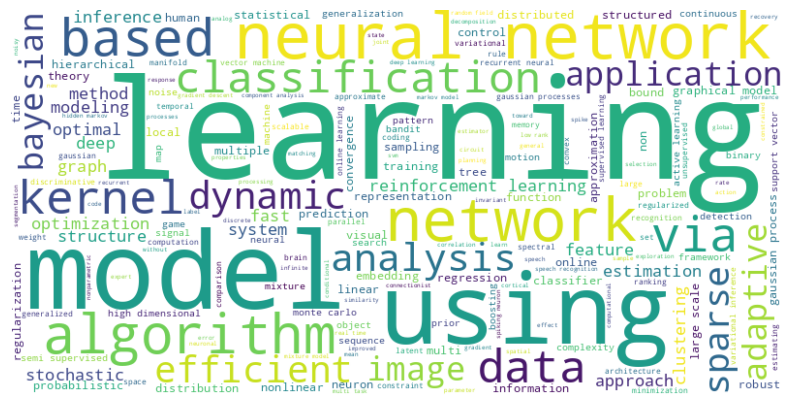

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(long_string)

# Generate a word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Prepare the text for LDA analysis

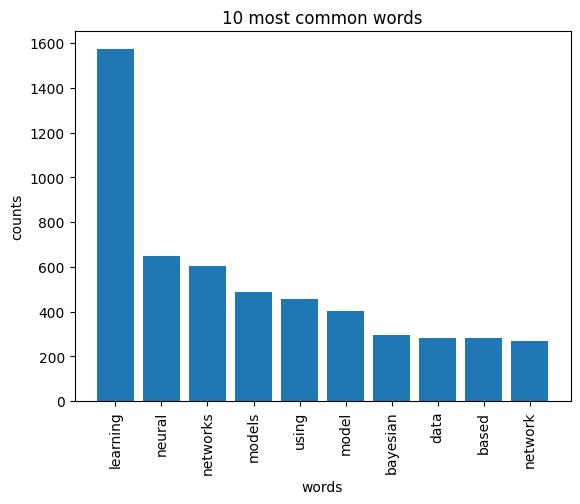

In [19]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np


# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Analysing trends with LDA

In [21]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
information learning sparse random vector using model support based sampling

Topic #1:
neural networks learning inference model network bayesian models using variational

Topic #2:
clustering learning kernel matrix using bounds graph optimal algorithm rank

Topic #3:
learning recognition neural algorithms network deep analysis using gaussian search

Topic #4:
learning models data classification multi optimization analysis bayesian supervised markov


In [23]:
# The historical data indicates that:
more_papers_published_in_2018 = True
